### solution of laplace equation

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
nmax = 51
U = np.zeros((nmax, nmax))

In [4]:
x = np.linspace(0, 1, nmax)
y = np.linspace(0, 1, nmax)
X, Y = np.meshgrid(x,y)

In [28]:
U[0, :] = y/(1 + y**2)
U[-1, :] = y/(4 + y**2)
U[:, 0] = 0.0
U[:, -1] = 1/((1 + x)**2 + 1)

In [29]:
max_iter = 2000
tol = 1e-6

In [30]:
for k in range(max_iter):
    U_old = U.copy()
    for i in range(1, nmax - 1):
        for j in range(1, nmax - 1):
            U[i, j] = 0.25 * (U[i, j+1] + U[i+1, j] + U[i-1, j] + U[i, j-1])

    if np.max(np.abs(U - U_old)) < tol:
        break

In [37]:
def U_a(x, y):
    return y/((1 + x)**2 + y**2)

In [54]:
y_index = int((nmax - 1)*0.5)
x_index = int((nmax - 1)*0.5)

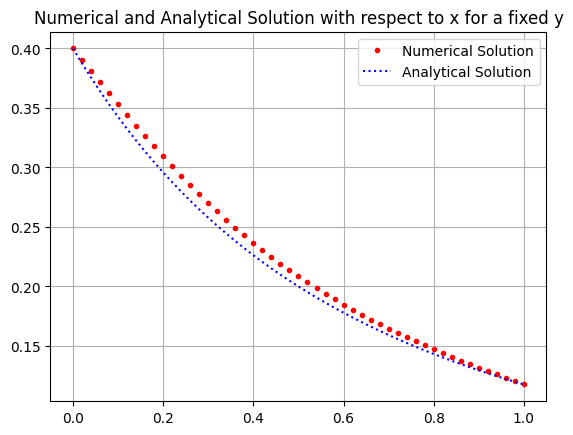

In [55]:
plt.plot(x, U[:, y_index], 'r.', label = "Numerical Solution")
plt.plot(x, U_a(x, 0.5), 'b:', label = "Analytical Solution")
plt.title("Numerical and Analytical Solution with respect to x for a fixed y")
plt.grid(True)
plt.legend()
plt.show()

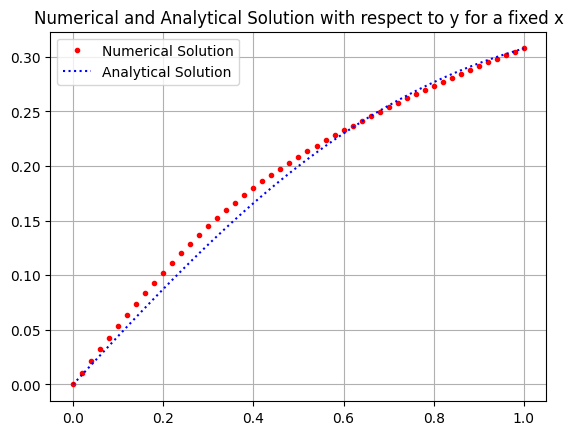

In [56]:
plt.plot(x, U[x_index, :], 'r.', label = "Numerical Solution")
plt.plot(x, U_a(0.5, x), 'b:', label = "Analytical Solution")
plt.title("Numerical and Analytical Solution with respect to y for a fixed x")
plt.grid(True)
plt.legend()
plt.show()

### wave equation

In [111]:
import numpy as np
import matplotlib.pyplot as plt

L = 1
T = 1.5
nx = 201
nt = 600
dx = L/(nx -1)
dt = T/(nt)

x = np.linspace(0, L, nx)
c = 1

r = c * dt/dx #courant number
r

0.5

In [112]:
U = np.zeros((nt, nx))
U[0, :] = np.sin(np.pi * x)
U[:, 0] = 0.0
U[:, -1] = 0.0

for i in range(1, nx-1):
    U[1, i] = U[0, i] + 0.5 * (r**2) * (U[0, i+1] - 2*U[0, i] + U[0, i-1])

for n in range(1, nt-1):
    for i in range(1, nx-1):
        U[n+1, i] = 2*U[n,i] - U[n-1, i] + (r**2) * (U[n, i+1] - 2*U[n, i] + U[n, i-1])

U

array([[ 0.        ,  0.01570732,  0.03141076, ...,  0.03141076,
         0.01570732,  0.        ],
       [ 0.        ,  0.01570683,  0.03140979, ...,  0.03140979,
         0.01570683,  0.        ],
       [ 0.        ,  0.01570538,  0.03140688, ...,  0.03140688,
         0.01570538,  0.        ],
       ...,
       [ 0.        , -0.00037063, -0.00074117, ..., -0.00074117,
        -0.00037063,  0.        ],
       [ 0.        , -0.00024729, -0.00049452, ..., -0.00049452,
        -0.00024729,  0.        ],
       [ 0.        , -0.00012393, -0.00024784, ..., -0.00024784,
        -0.00012393,  0.        ]])

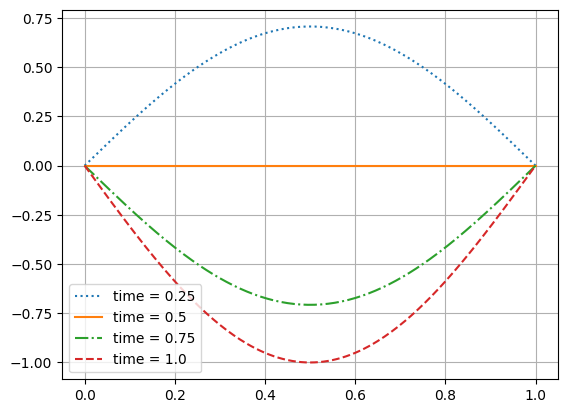

In [113]:
steps = [100, 200, 300, 400]
lines = [':', '-', '-.','--']

for i in range(4):
    plt.plot(x, U[steps[i], :], ls = lines[i], label = f'time = {np.round(dt*steps[i],4)}')

plt.legend()
plt.grid(True)
plt.show()

### heat equation:

In [141]:
import numpy as np
import matplotlib.pyplot as plt

L = 1.0
T = 0.5
r = 0.4
a = 1

nx = 201
dx = L/(nx - 1)
x = np.linspace(0, L, nx)

dt = (r * dx**2)/a**2
nt = int((T/dt)+1)

U = np.zeros((nx, nt))

mid = (nx-1)/2
U[100, 0] = 100
U[0, :] = 0.0
U[-1, :] = 0.0

for n in range(0, nt-1):
    for i in range(1, nx-1):
        U[i, n+1] = U[i, n] + r*(U[i+1, n] + U[i-1, n] - 2*U[i, n])

nt

50000

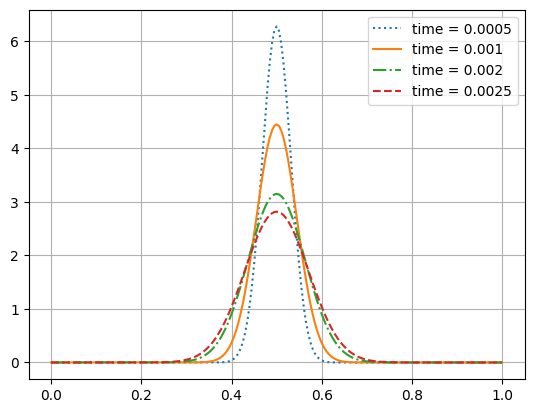

In [142]:
lines = [':', '-', '-.', '--']
times = [50, 100, 200, 250]

for i in range(4):
    plt.plot(x, U[:, times[i]], ls = lines[i], label = f'time = {np.round((dt * times[i]), 4)}')

plt.legend()
plt.grid(True)
plt.show()